# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
api_key = weather_api_key
base_url = "http://api.openweathermap.org/data/2.5/weather"



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}?q={city}&appid={api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ponta delgada
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | ratnagiri
Processing Record 4 of Set 1 | feodosiya
Processing Record 5 of Set 1 | coahuayana de hidalgo
Processing Record 6 of Set 1 | kourou
Processing Record 7 of Set 1 | haiku-pauwela
Processing Record 8 of Set 1 | manicore
Processing Record 9 of Set 1 | mulayjah
Processing Record 10 of Set 1 | murzuq
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | dampit
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | lihue
Processing Record 15 of Set 1 | vargarda
Processing Record 16 of Set 1 | vadso
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | afaahiti
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | fisterra
Processing Record 21 of Set 1 | tazovsky
Processing Record 22 of Set 1 | port-aux-francais
Pro

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ponta delgada,37.7333,-25.6667,297.55,88,40,3.09,PT,1722894578
1,yellowknife,62.4560,-114.3525,295.60,41,75,1.79,CA,1722894579
2,ratnagiri,16.9833,73.3000,298.97,90,100,4.32,IN,1722894580
3,feodosiya,45.0333,35.3833,297.28,62,49,5.13,UA,1722894582
4,coahuayana de hidalgo,18.7000,-103.6583,304.22,67,97,3.94,MX,1722894583


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,282.16,76,20,2.06,GL,1722890779
1,holualoa,19.6228,-155.9522,299.06,83,40,3.60,US,1722890780
2,minas de marcona,-15.2119,-75.1103,287.66,64,0,6.90,PE,1722890781
3,naze,28.3667,129.4833,300.66,86,25,3.27,JP,1722890782
4,santa marta,11.2408,-74.1990,304.76,69,40,2.24,CO,1722890783


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

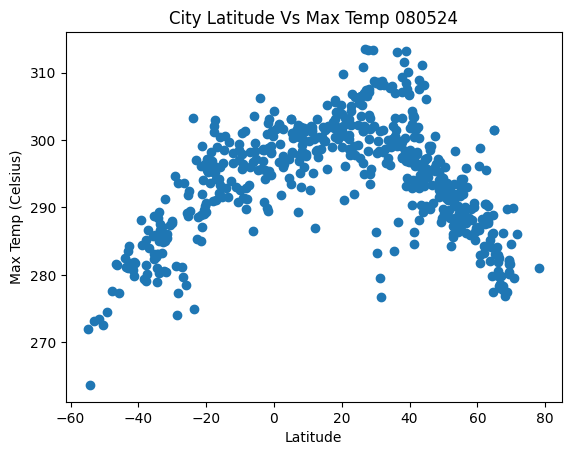

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp (Celsius)")
plt.title("City Latitude Vs Max Temp 080524")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

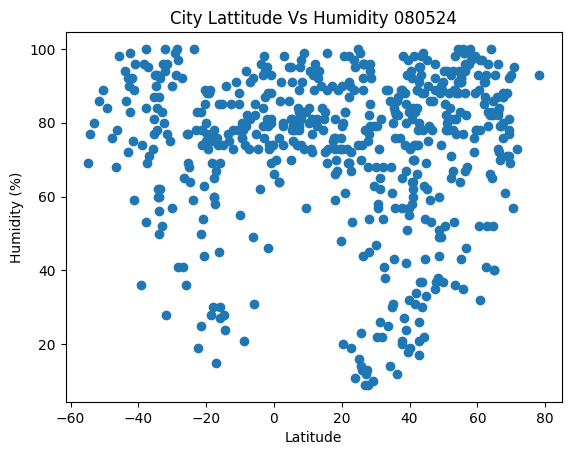

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Lattitude Vs Humidity 080524")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

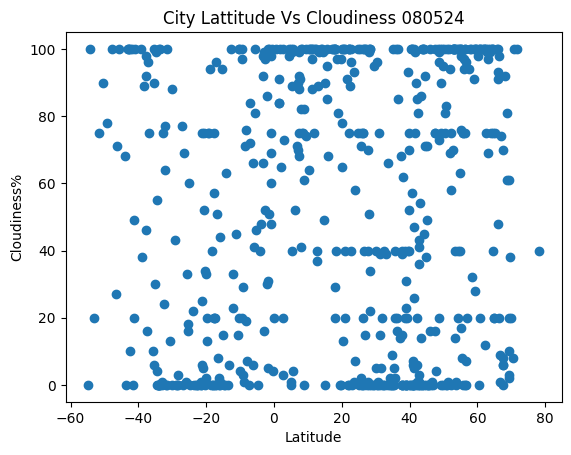

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness%")
plt.title("City Lattitude Vs Cloudiness 080524")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

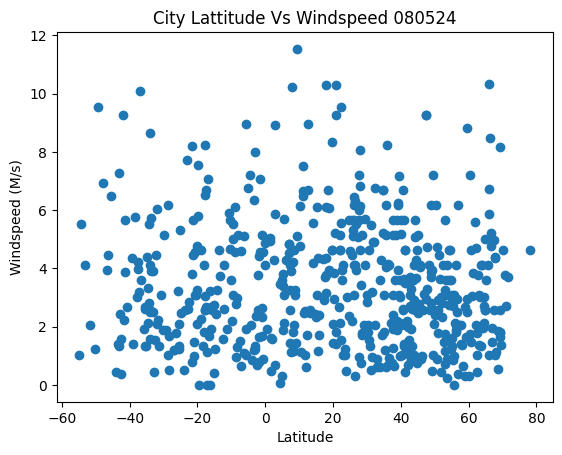

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Windspeed (M/s)")
plt.title("City Lattitude Vs Windspeed 080524")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linreg_plot(dataframe, x, y):
    x_values = dataframe[x]
    y_values = dataframe[y]
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, marker='o', color='b', label='Data')
    plt.plot(x_values, regress_values, color='r', label=f'Linear regression line\n(slope={slope:.2f}, intercept={intercept:.2f})')
    plt.title(f'{x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    
    # Adding the equation text to the plot
    equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(min(x_values), max(y_values), equation_text, fontsize=12, color='r')
    
    plt.show()
    
    print(f"R-squared: {r_value**2:.2f}")
    print(f"Equation: y = {slope:.2f}x + {intercept:.2f}")


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ponta delgada,37.7333,-25.6667,297.55,88,40,3.09,PT,1722894578
1,yellowknife,62.4560,-114.3525,295.60,41,75,1.79,CA,1722894579
2,ratnagiri,16.9833,73.3000,298.97,90,100,4.32,IN,1722894580
3,feodosiya,45.0333,35.3833,297.28,62,49,5.13,UA,1722894582
4,coahuayana de hidalgo,18.7000,-103.6583,304.22,67,97,3.94,MX,1722894583


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
7,manicore,-5.8092,-61.3003,303.63,31,41,1.02,BR,1722894586
11,dampit,-8.2116,112.7493,292.95,94,76,1.31,ID,1722894590
12,new norfolk,-42.7826,147.0587,284.22,90,100,2.42,AU,1722894591
17,afaahiti,-17.7500,-149.2833,302.08,78,57,6.52,PF,1722894596
18,edinburgh of the seven seas,-37.0676,-12.3116,286.63,95,96,10.10,SH,1722894597


###  Temperature vs. Latitude Linear Regression Plot

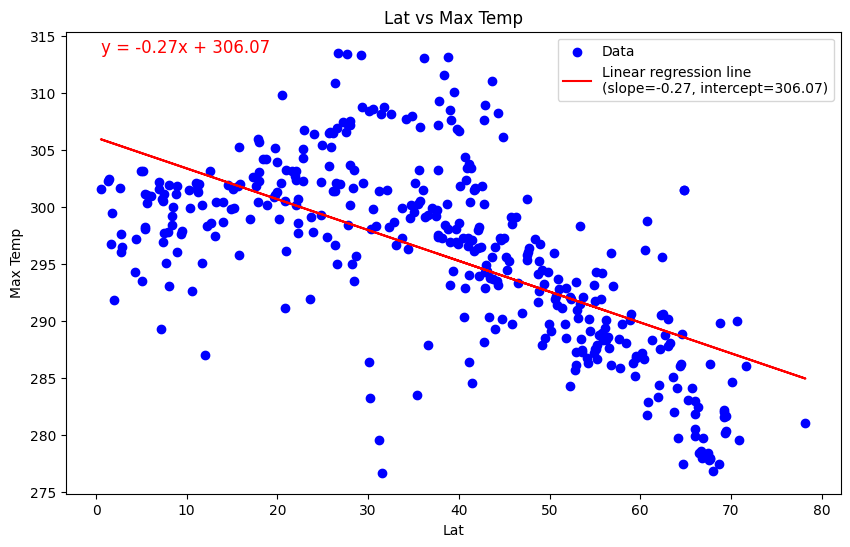

R-squared: 0.41
Equation: y = -0.27x + 306.07


In [19]:
# Linear regression on Northern Hemisphere
linreg_plot(northern_hemi_df,'Lat','Max Temp')

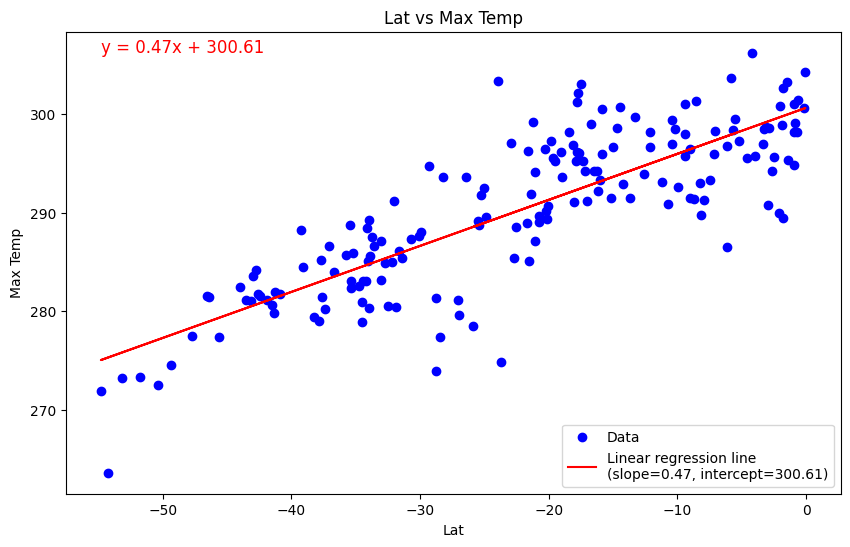

R-squared: 0.68
Equation: y = 0.47x + 300.61


In [21]:
# Linear regression on Southern Hemisphere
linreg_plot(southern_hemi_df,'Lat','Max Temp')

**Discussion about the linear relationship:** In the nothern hemisphere, the max temprature is about half way up, but decrease3s as you move towards the equator and the poles. In the southern hemisphere, temprature increases as you move towards the equator.

### Humidity vs. Latitude Linear Regression Plot

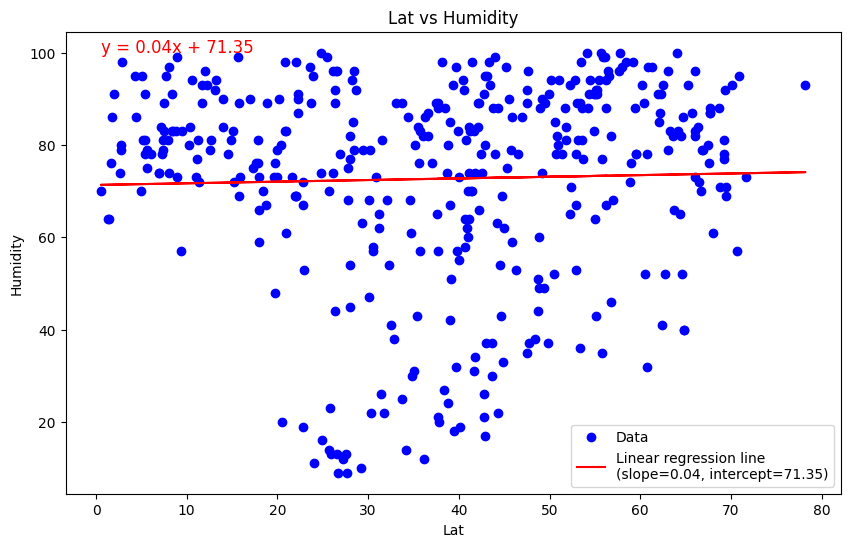

R-squared: 0.00
Equation: y = 0.04x + 71.35


In [22]:
linreg_plot(northern_hemi_df,'Lat','Humidity')

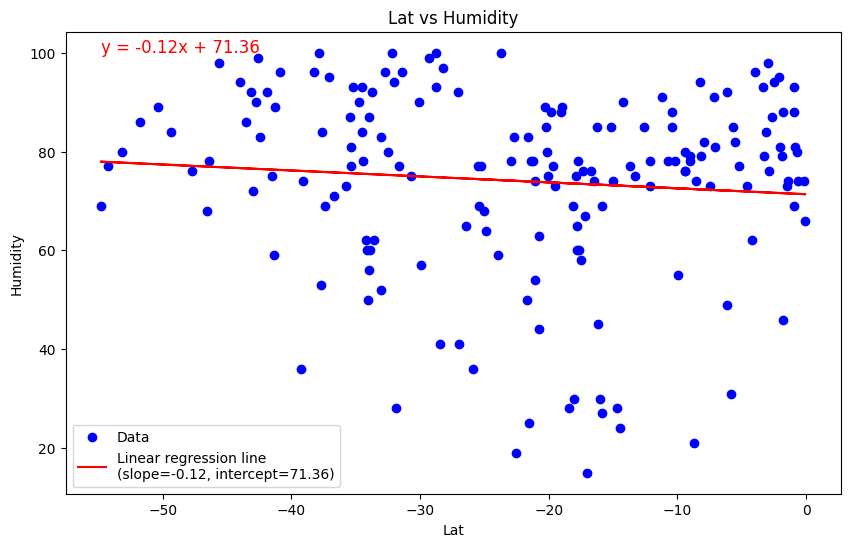

R-squared: 0.01
Equation: y = -0.12x + 71.36


In [24]:
# Southern Hemisphere
linreg_plot(southern_hemi_df,'Lat','Humidity')

**Discussion about the linear relationship:** There is no correlation between Lattitude and humidity in either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

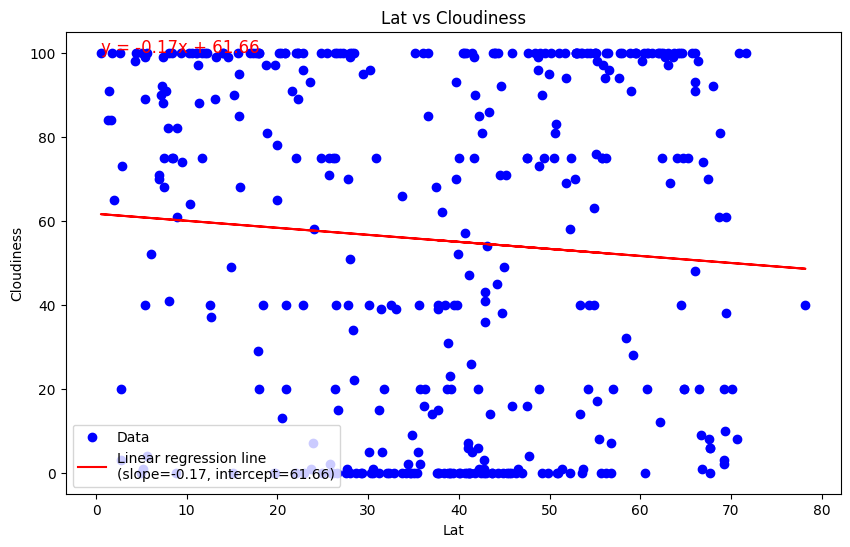

R-squared: 0.01
Equation: y = -0.17x + 61.66


In [25]:
# Northern Hemisphere
linreg_plot(northern_hemi_df,'Lat','Cloudiness')

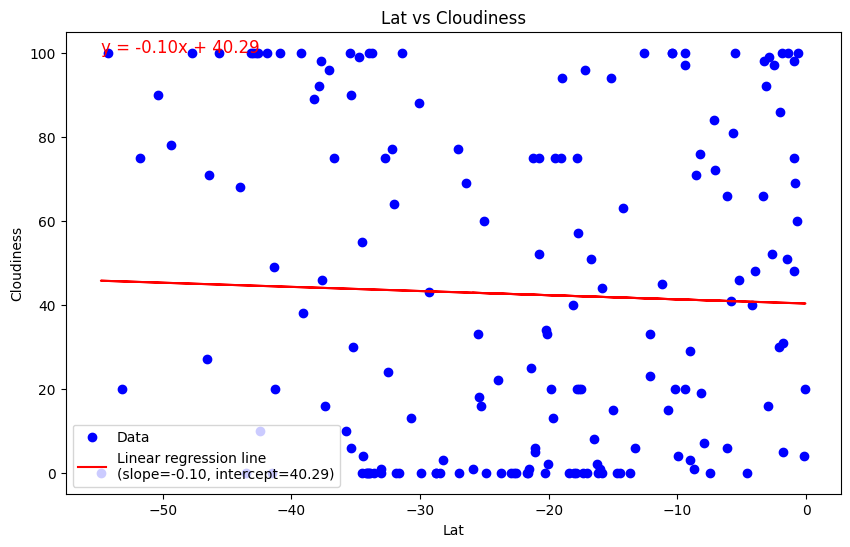

R-squared: 0.00
Equation: y = -0.10x + 40.29


In [26]:
# Southern Hemisphere
linreg_plot(southern_hemi_df,'Lat','Cloudiness')

**Discussion about the linear relationship:** Cloudiness has no relationship with Latitude in either hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

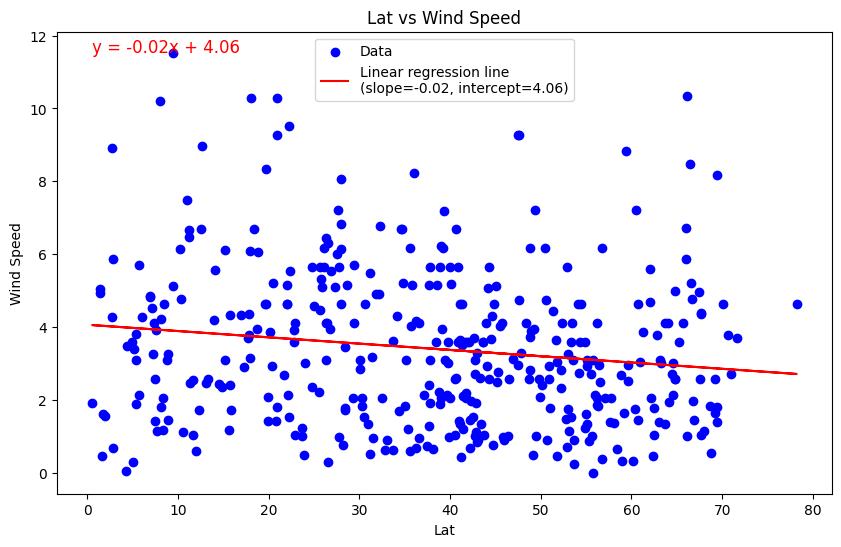

R-squared: 0.02
Equation: y = -0.02x + 4.06


In [28]:
# Northern Hemisphere
linreg_plot(northern_hemi_df,'Lat','Wind Speed')

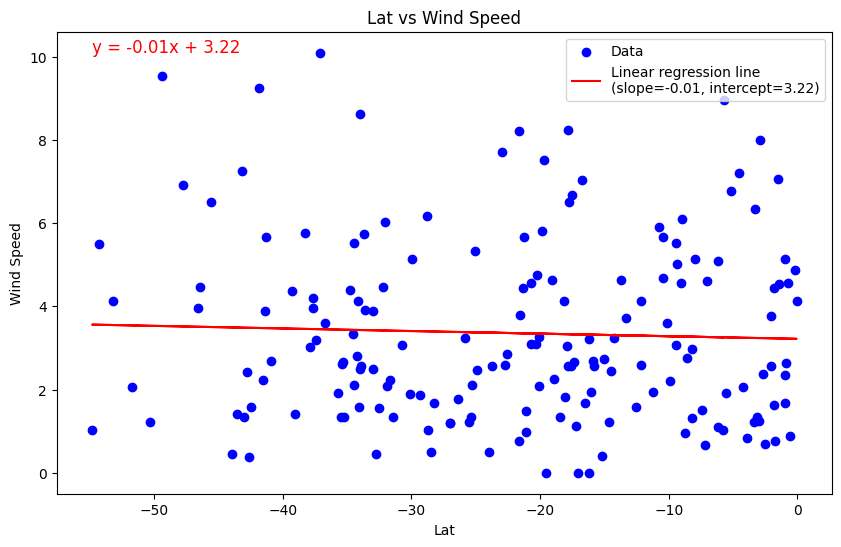

R-squared: 0.00
Equation: y = -0.01x + 3.22


In [29]:
# Southern Hemisphere
linreg_plot(southern_hemi_df,'Lat','Wind Speed')

**Discussion about the linear relationship:** There is no correlation between windspeed and Latitude in either hemisphere.